In [1]:
import numpy as np
import pandas as pd
import scipy.interpolate as ip

import bt_periodicity as btp

import matplotlib.pyplot as plt
%matplotlib inline

# Create Signal

We create here a periodic signal and introduce some noise

,interp
0.000000,0.069772
0.500501,0.003158
1.001001,-0.057734
1.501502,-0.111730
2.002002,-0.157802


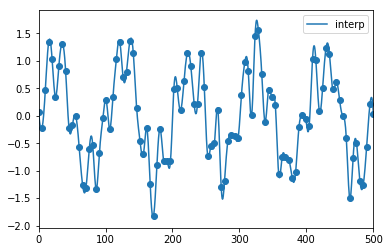

In [2]:
nb_pt = 100
x = np.linspace(0, 500., nb_pt)

# Create fake dist
y = np.sin(2 * np.pi * x)
y += 0.5*np.sin(0.3 * np.pi * x)
y += np.random.normal(0, 0.25, nb_pt)

# Interpolate it
interp = ip.UnivariateSpline(x, y, k=4, s=0.)
x_interp = np.linspace(0, 500., nb_pt*10)
interp_signal = pd.DataFrame(interp(x_interp), index=x_interp, columns=['interp'])
ax = interp_signal.plot()

# Plot dist
ax.scatter(x, y)

interp_signal.head()

# Cluster signal segments

We attempt to cluster together portion of the signal (segments) with respect to their shapes (with a tolerance)

In [3]:
find_periodicity = btp.sequence_signal(y, x)
seq = find_periodicity(.2)
seq

OrderedDict([((0.0, 16.439090296127908), 0),
             ((16.439090296127908, 35.360089626675446), 1),
             ((35.360089626675446, 54.326806201162064), 1),
             ((54.326806201162064, 78.678435620811797), 2),
             ((78.678435620811797, 100.14423959097617), 3),
             ((100.14423959097617, 120.28248194402428), 0),
             ((120.28248194402428, 138.05968888094532), 1),
             ((138.05968888094532, 161.26420185437476), 4),
             ((161.26420185437476, 181.29928846956508), 2),
             ((181.29928846956508, 191.14109156915356), 5),
             ((191.14109156915356, 204.29159238868985), 3),
             ((204.29159238868985, 223.35455543769612), 0),
             ((223.35455543769612, 243.45354499203901), 1),
             ((243.45354499203901, 258.13143552071324), 6),
             ((258.13143552071324, 267.00537945860282), 3),
             ((267.00537945860282, 291.03349405686777), 3),
             ((291.03349405686777, 310.31744561642131),

_Plot clusters_

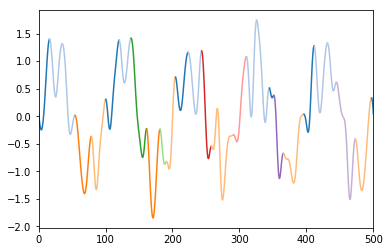

In [4]:
fig, ax = plt.subplots(1)

color_dict = dict(zip(set(seq.values()), plt.cm.get_cmap('tab20').colors))

for (x_min, x_max), clu in seq.iteritems():
    plot_df = interp_signal[(interp_signal.index >= x_min) & (interp_signal.index <= x_max)]
    
    if len(plot_df.values) > 0:
        ax = plot_df['interp'].plot(ax=ax, color=color_dict[clu])
        
        
plt.show()

# Find principal period

Based on HMM, we are able to evaluate clusters of segment repeat themself aka. principal period.

In [5]:
period_seg = btp.find_principal_period(find_periodicity, .2)
period_seg

[(0.0, 16.439090296127908),
 (16.439090296127908, 120.28248194402428),
 (120.28248194402428, 223.35455543769612),
 (223.35455543769612, 310.31744561642131),
 (310.31744561642131, 411.46635267963177),
 (411.46635267963177, 500.0)]

_Plot periods_

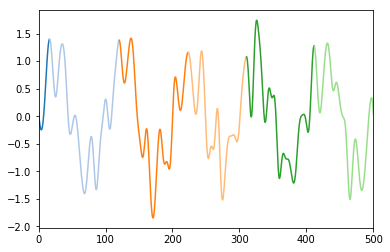

In [6]:
fig, ax = plt.subplots(1)

color_iter = iter(plt.cm.get_cmap('tab20').colors)

for (x_min, x_max) in period_seg:
    plot_df = interp_signal[(interp_signal.index >= x_min) & (interp_signal.index <= x_max)]
    
    ax = plot_df['interp'].plot(ax=ax, color=next(color_iter))
    
        
plt.show()

# Conclusion

We sucessfully detect principal period on a noisy signal without using its harmonics.<br>
It is important to note the importance of the tolerance factor which represent the maximum deviantion between 2 segments.